# Predicting the Survival of Passengers on the Titanic

## My machine learning steps usually follow a typical thought process:

1. Figure out the problem or business driver I'm trying to solve
2. Gather the required data for the analysis
3. Clean the data as needed
4. Do some high level statistical analysis on the data to get familiar with the dataset
5. Model data (training the model)
6. Validate the model with test data
7. Take a step back, look at the results, and strategize any optimizations

The data being used in this notebook is pulled from a Kaggle provided db: https://www.kaggle.com/c/titanic/data

I will try to walk through each one of these steps in this notebook to outline the thought process above in detail.


### 1. Figure out the problem

* The problem in this specific scenario is quite clear: given a data set of passenger information and survival information, I need to create a model that can intake new passengers and determine whether they survive or not.
* As an aside, this step might seem blatantly obvious, but sometimes we can get carried away with jumping into the data without understanding what we're looking to get out of it.  Starting with this fundamental understanding of the problem at hand always helps me focus my subsequent analysis in a specific direction.

### 2. Gather the data

* This data is provided directly from Kaggle: https://www.kaggle.com/c/titanic/data
* 2 files are provided:
    * Train.csv
    * Test.csv

### 3. Prepare the data

* Now we start putting pen on paper (or finger on keyboard here I suppose)
* This step can account for many tasks such as importing libraries, importing data files, cleaning data, etc.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#### Now I begin importing the data

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
full_set = [train, test]

<div class="alert alert-block alert-info">
This last line will make more sense later so I can clean both sets using one for loop
</div>


In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Explanation of the columns (this is taken from Kaggle):

| Variable | Definition | Key |
| --- | --- | --- |
| survived | Survival | 0 = No, 1 = Yes |
| pclass | Ticket Class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |
| Age | Age in years |
| sibsp | # of siblings/spouses aboard |
| parch | # of parents/children aboard |
| ticket | Ticket Number |
| fare | Passenger Fare Cost |
| cabin | Cabin number |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


####  I pause here for a significant amount of time because this is where I start visualizing how I will be configuring the data and what I'm actually looking for (remember Step 1?)

<div class="alert alert-block alert-info">
The data I'm looking to compare against is "Survived" - remember, the problem I'm trying to address is whether I can predict a passenger surviving or not based on some variables
<br><br>
The other takeaways here are that some columns can be removed from our training model since they likely won't have any affect on passenger survival, such as:<br><br>
    * Ticket - looks to be a random string representing a ticket #<br>
    * PassengerId - I analyzed the data and this column is an index of the rows<br>
    * There may be additional added but these 2 are immediate to me
   
</div>


#### The next task is to clean the data 

<div class="alert alert-block alert-info">
I start by creating a heatmap of the columns in train + test and any null data in them to visualize the gaps I have to fix
</div>


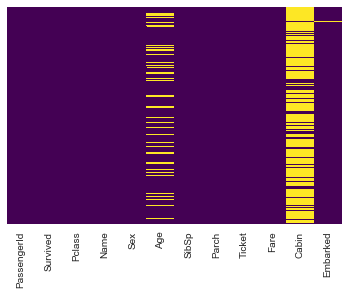

In [6]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap='viridis')

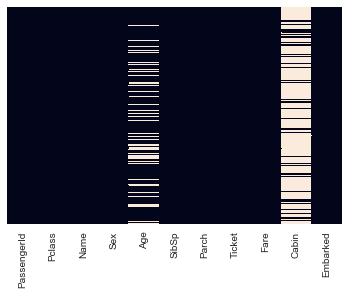

In [7]:
sns.heatmap(test.isnull(),yticklabels = False,cbar = False)

<div class="alert alert-block alert-info">
I can also review the sum of the null values for more specificity
</div>

In [8]:
print('Train Data Set Nulls:\n', train.isnull().sum())
print('---------------------')
print('Test Data Set Nulls:\n', test.isnull().sum())

Train Data Set Nulls:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------
Test Data Set Nulls:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<div class="alert alert-block alert-info">
Age definitely has some null values that need to be filled - I could fill the nulls with the mean age, but I decided to do it a bit smarter.  Can we get a more specific age, such as based on what ticket class they were in?<br><br>
Cabin is majority null - do I really need this column?<br><br>
Few misc issues in Embarked and Fare
</div>


In [9]:
for set in full_set:
    set['Embarked'].fillna(set['Embarked'].mode()[0],inplace=True)
    set['Fare'].fillna(set['Fare'].mean(),inplace=True)

Text(0, 0.5, 'Age')

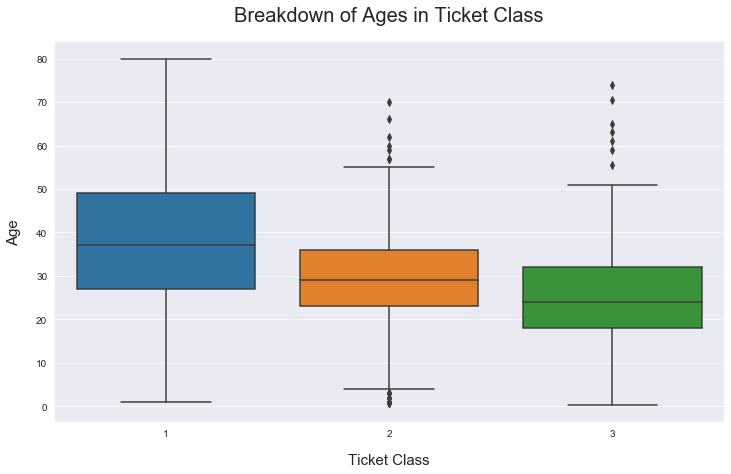

In [10]:
plt.subplots(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
plt.title('Breakdown of Ages in Ticket Class', fontsize=20,pad=20)
plt.xlabel('Ticket Class',fontsize=15,labelpad=15)
plt.ylabel('Age',fontsize=15,labelpad=15)

<div class="alert alert-block alert-info">
This boxplot helps me see the relative ages per Ticket Class.  I can see that the average age in 1st class is ~37, 2nd class is ~29, 3rd class is ~24.  I will use this estimation to create a function that will fill the null values with these estimations depending on what ticket class the null is associated with.
   
</div>

In [11]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

for dataset in full_set:
    dataset['Age'] = dataset[['Age','Pclass']].apply(fill_age,axis=1)

In [12]:
print('Train Data Set Nulls:\n', train.isnull().sum())
print('---------------------')
print('Test Data Set Nulls:\n', test.isnull().sum())

Train Data Set Nulls:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
---------------------
Test Data Set Nulls:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


<div class="alert alert-block alert-info">
Previously I was questioning whether I need the Cabin column.  There are too many nulls, so I'm going to remove this column.  We can potentially add it back in during our optimization if needed. <br><br>
I also previously said I would drop Ticket and PassengerId, so I will do that now
</div>

In [13]:
dropped_columns = ['PassengerId','Ticket','Cabin']
for dataset in full_set:
    dataset.drop(dropped_columns,axis=1,inplace = True)

* Now I validate a few things:
    * Previous heatmaps to ensure there is no null data left
    * Validate null sums to ensure there are no nulls left to address
    * Look at the train head to ensure the columns I dropped are gone

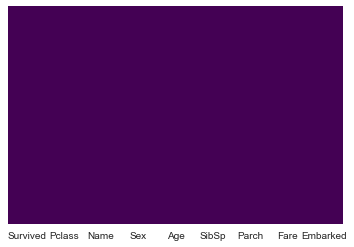

In [14]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap='viridis')

In [15]:
print('Train Data Set Nulls:\n', train.isnull().sum())
print('---------------------')
print('Test Data Set Nulls:\n', test.isnull().sum())

Train Data Set Nulls:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
---------------------
Test Data Set Nulls:
 Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [16]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 4. High Level Statistical Analysis

### 4.1 Sex Analysis

Text(0, 0.5, '% of passengers survived')

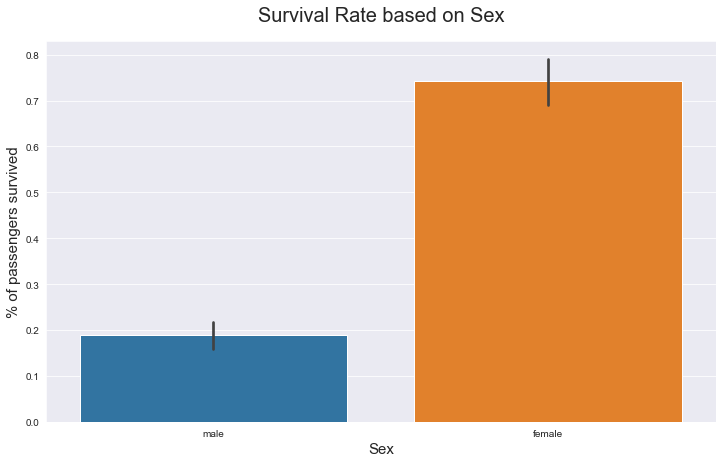

In [17]:
plt.subplots(figsize = (12,7))
sns.barplot(x = "Sex", y = "Survived", data = train)
plt.title('Survival Rate based on Sex', fontsize = 20, pad = 20)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('% of passengers survived', fontsize = 15)

<div class="alert alert-block alert-info">
This bar graph shows that ~74% of females survived, while only ~19% of men survived.  There seems to be a correlation between sex and survival rate - which would make sense as women/children were prioritized.
</div>

Text(0, 0.5, '# of passengers')

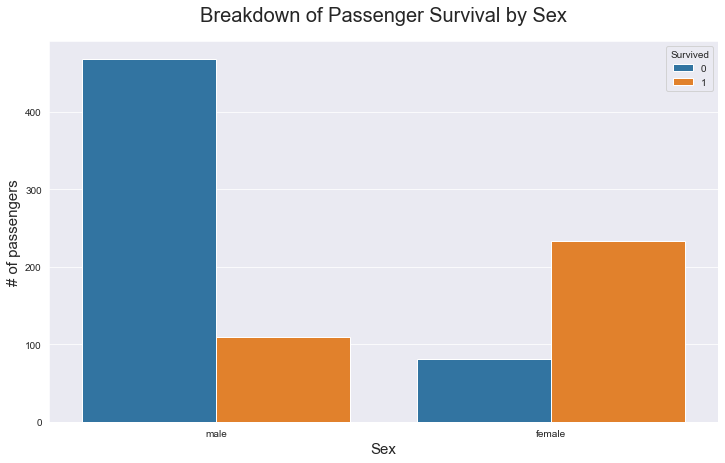

In [18]:
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Sex',hue = 'Survived', data = train)
plt.title('Breakdown of Passenger Survival by Sex', fontsize = 20, pad = 20)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('# of passengers', fontsize = 15)

#### Summary of Findings

<div class="alert alert-block alert-info">
It is quite clear that females had a much better survival rate than males.
</div>


### 4.2 Ticket Class Analysis

Text(0, 0.5, '% of passengers survived')

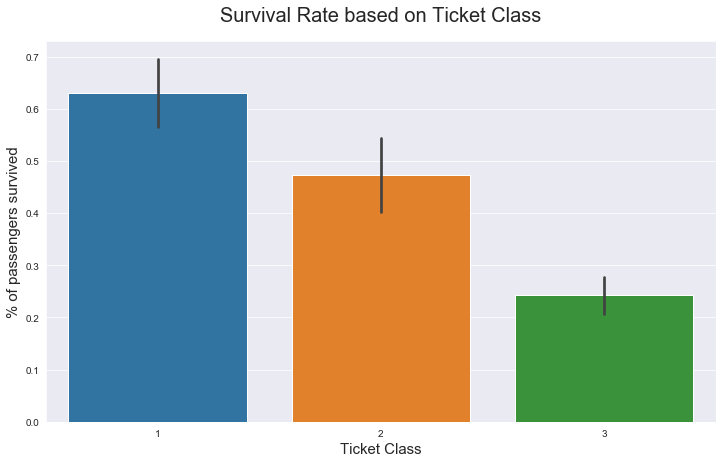

In [19]:
plt.subplots(figsize = (12,7))
sns.barplot(x = "Pclass", y = "Survived", data = train)
plt.title('Survival Rate based on Ticket Class', fontsize = 20, pad = 20)
plt.xlabel('Ticket Class', fontsize = 15)
plt.ylabel('% of passengers survived', fontsize = 15)

#### Summary of Findings

<div class="alert alert-block alert-info">
It is quite clear that as the ticket class decreases, the % of passengers survived also decreases.  So you have a higher chance of survival the higher your ticket class is.
</div>


### 4.3 Fare Analysis

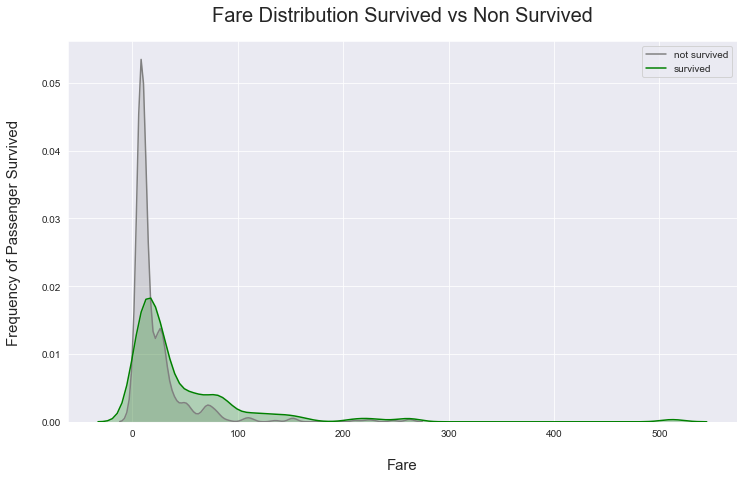

In [20]:
fig = plt.figure(figsize=(12,7))
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 20, pad = 20)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

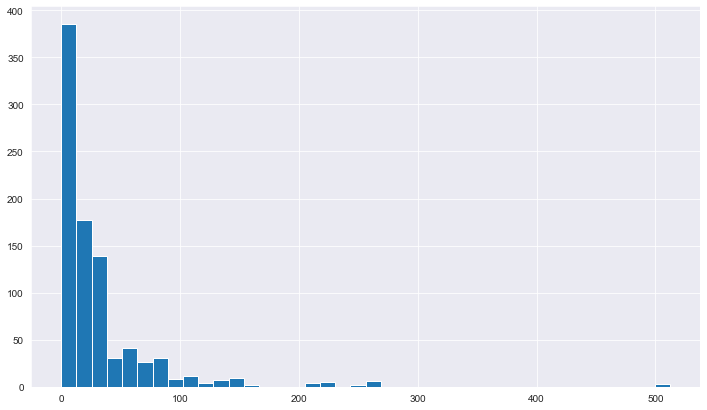

In [21]:
train['Fare'].hist(bins=40,figsize=(12,7))

#### Summary of Findings

<div class="alert alert-block alert-info">
These results are not so clear cut.  It appears that passengers who bought a ticket for 100 or less did not survive.  However, I also see in the histogram for the Fare column there is an outlier data at a little over the 500 mark, so I may want to remove that to get a more accurate representation.
</div>


### 4.4 Age Analysis

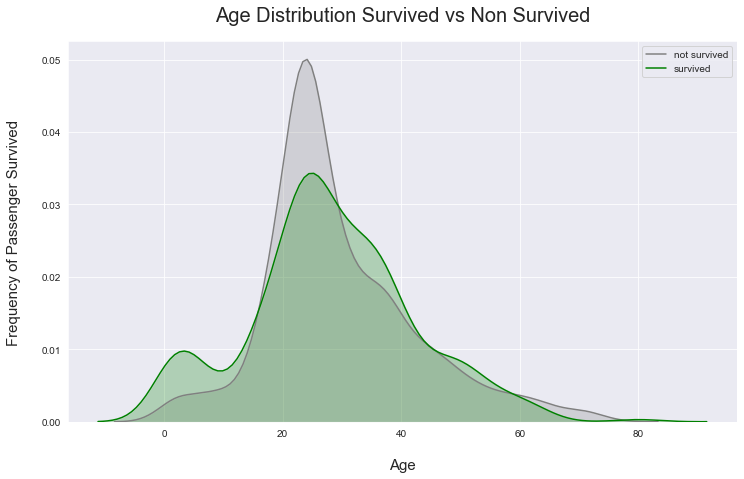

In [22]:
fig = plt.figure(figsize=(12,7))
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution Survived vs Non Survived', fontsize = 20, pad = 20)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20);

<div class="alert alert-block alert-info">
Nothing very definitive here.  Survived kde shows a bump in the child/teen ages, which would make sense that children were prioritized. Let's dig into this a bit more.
</div>

In [23]:
for dataset in full_set:
    bins = [0, 12, 17, 60, np.inf]
    labels = ['child', 'teenager', 'adult', 'elderly']
    age_groups = pd.cut(dataset.Age, bins, labels = labels)
    dataset['AgeGroup'] = age_groups

Text(0, 0.5, 'Survival Rate')

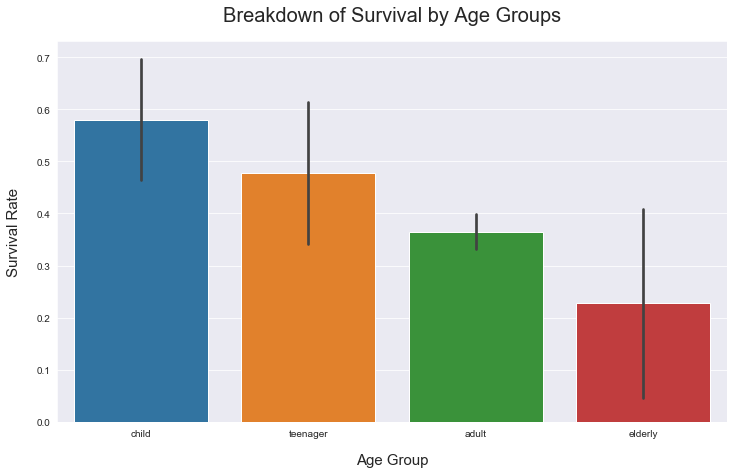

In [24]:
plt.subplots(figsize = (12,7))
sns.barplot(x = 'AgeGroup', y = 'Survived', data = train)
plt.title('Breakdown of Survival by Age Groups', fontsize = 20, pad = 20)
plt.xlabel('Age Group', fontsize=15, labelpad=15)
plt.ylabel('Survival Rate',fontsize=15, labelpad=15)

#### Summary of Findings

<div class="alert alert-block alert-info">
Dividing the data into age buckets shows that children are definitely more likely to survive.
</div>


### 4.5 Sibling and Spouse Analysis

Text(0, 0.5, 'Survival Rate')

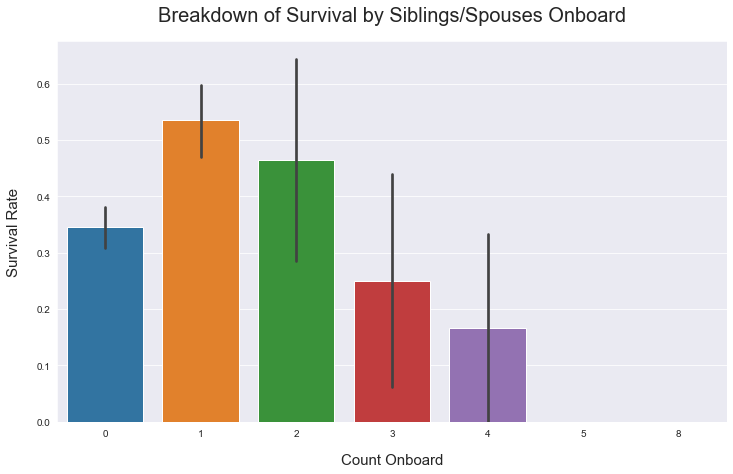

In [25]:
plt.subplots(figsize = (12,7))
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.title('Breakdown of Survival by Siblings/Spouses Onboard', fontsize = 20, pad = 20)
plt.xlabel('Count Onboard', fontsize=15, labelpad=15)
plt.ylabel('Survival Rate',fontsize=15, labelpad=15)

#### Summary of Findings

<div class="alert alert-block alert-info">
The more siblings or spouses onboard, the lower your survival rate.  However, for some reason those with 1 or 2 siblings/spouses onboard had a higher chance of survival than those that are by themselves.  
</div>

### 4.6 Parents and Children Analysis

Text(0, 0.5, 'Survival Rate')

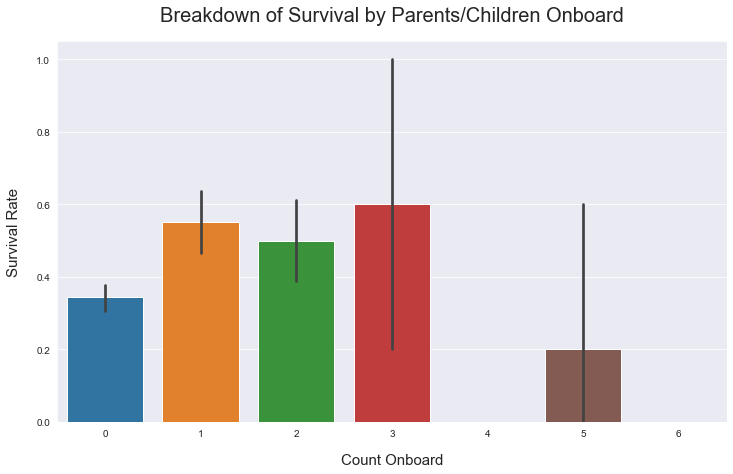

In [26]:
plt.subplots(figsize = (12,7))
sns.barplot(x = 'Parch',y = 'Survived',data = train)
plt.title('Breakdown of Survival by Parents/Children Onboard', fontsize = 20, pad = 20)
plt.xlabel('Count Onboard', fontsize=15, labelpad=15)
plt.ylabel('Survival Rate',fontsize=15, labelpad=15)

#### Summary of Findings

<div class="alert alert-block alert-info">
Those with less than 4 parents or children on board were more likely to survive.  However, we see a similar trend here that individuals who were solo generally had a less chance of survival than those with families. 
</div>


### 4.7 Embarkation Analysis

Text(0, 0.5, 'Survival Rate')

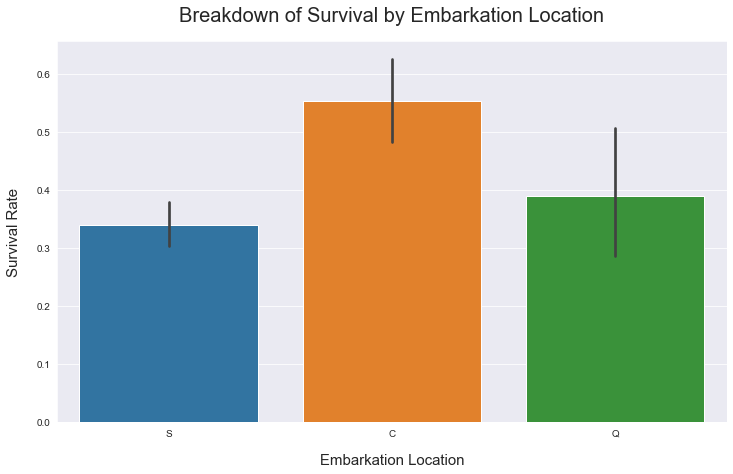

In [27]:
plt.subplots(figsize = (12,7))
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.title('Breakdown of Survival by Embarkation Location', fontsize = 20, pad = 20)
plt.xlabel('Embarkation Location', fontsize=15, labelpad=15)
plt.ylabel('Survival Rate',fontsize=15, labelpad=15)

Text(0, 0.5, '# of passengers')

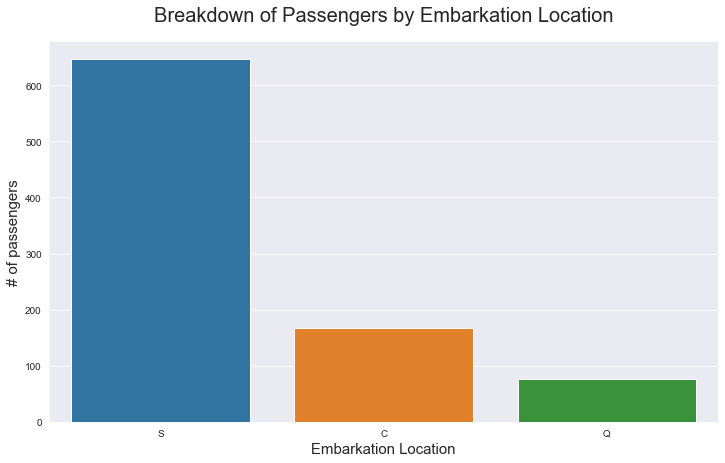

In [28]:
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Embarked', data = train)
plt.title('Breakdown of Passengers by Embarkation Location', fontsize = 20, pad = 20)
plt.xlabel('Embarkation Location', fontsize = 15)
plt.ylabel('# of passengers', fontsize = 15)

#### Summary of Findings

<div class="alert alert-block alert-info">
Passengers who embarked from "C" had the highest chance of survival.  Clearly the majority of the passengers came from S though, which also had the lowest survival rate.
</div>


## 5. Train Model

In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,adult


<div class="alert alert-block alert-info">
There are a few things I need to deal with before I proceed with modeling the training data.  I know ['Sex'] and ['Embarked'] need to be translated into a usable data format.  
</div>


In [30]:
sex_mapping = {'male':0, 'female':1}
for dataset in full_set:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,adult
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,adult
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,adult


In [32]:
embarked_mapping = {'S':1, 'C':2, 'Q':3}
for dataset in full_set:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,adult
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,adult
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,adult


<div class="alert alert-block alert-info">
This is looking better.  Next, I should deal with is the Name column.  Right now there isn't much conclusions to draw from this, but one additional transformation I can do is to translate the name prefixes (Mr., Mrs., etc.) into numerical maps and use that as an additional variable.
</div>


In [34]:
for dataset in full_set:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [35]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,adult,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,adult,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,adult,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,adult,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,adult,Mr


In [36]:
pd.crosstab(train['Title'],train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [37]:
for dataset in full_set:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Sir','Lady'], 'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

In [38]:
pd.crosstab(train['Title'],train['Sex'])

Sex,0,1
Title,,
Master,40,0
Miss,0,185
Mr,517,0
Mrs,0,126
Rare,19,1
Royalty,1,2


In [39]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty": 5, "Rare": 6}
for dataset in full_set:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,adult,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,adult,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,adult,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,adult,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,adult,1


<div class="alert alert-block alert-info">
I will drop the Name column now that I have extracted what I need.
</div>


In [40]:
for dataset in full_set:
    dataset.drop("Name",axis=1,inplace=True)

In [41]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,3,0,34.5,0,0,7.8292,3,adult,1
1,3,1,47.0,1,0,7.0000,1,adult,3
2,2,0,62.0,0,0,9.6875,3,elderly,1
3,3,0,27.0,0,0,8.6625,1,adult,1
4,3,1,22.0,1,1,12.2875,1,adult,3


<div class="alert alert-block alert-info">
The last column I need to address is the ['AgeGroup'] column.  There are 4 buckets that I created previously that I need to map to integers.
</div>


In [42]:
age_mappings = {'child':1, 'teenager':2, 'adult':3, 'elderly':4}
for dataset in full_set:
   
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mappings)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,0,22.0,1,0,7.2500,1,3,1
1,1,1,1,38.0,1,0,71.2833,2,3,3
2,1,3,1,26.0,0,0,7.9250,1,3,2
3,1,1,1,35.0,1,0,53.1000,1,3,3
4,0,3,0,35.0,0,0,8.0500,1,3,1


<div class="alert alert-block alert-info">
Data looks good for now - let's proceed into modeling our training data.
</div>


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = train.drop(['Survived'],axis=1)
y = train['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/Users/jonpark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 6. Validate the Model (aka Test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       117
           1       0.73      0.72      0.73        80

    accuracy                           0.78       197
   macro avg       0.77      0.77      0.77       197
weighted avg       0.78      0.78      0.78       197



In [66]:
from sklearn.metrics import accuracy_score

acc_logmodel = round(accuracy_score(predictions, y_test) * 100, 2)
print(acc_logmodel)

78.17


## 7. Take a Step Back for Optimizations

Accuracy is just OK here - some additional ideas I could do to potentially refine the model is translate fares into buckets?